In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from xgboost import XGBRegressor, plot_tree, plot_importance

from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
bike_train = pd.read_csv('train.csv')
bike_train.date_time = pd.to_datetime(bike_train.date_time)
bike_train['date_year'] = bike_train.date_time.apply(lambda t : t.year)

In [ ]:
bike_train = bike_train.drop(['date_time'], axis=1)
bike_train

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,date_year
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018
...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,2020
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,2020
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,2020
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,2020


In [ ]:
bike_test = pd.read_csv('test.csv')
bike_test.date_time = pd.to_datetime(bike_test.date_time)
bike_test['date_year'] = bike_test.date_time.apply(lambda t : t.year)

In [ ]:
bike_test = bike_test.drop(['date_time'], axis=1)
bike_test

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,date_year
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,116640,2021
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,110607,2021
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,14026,2021
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,94160,2021
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,110533,2021
...,...,...,...,...,...,...,...,...,...,...
86,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486,105813,2021
87,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378,92869,2021
88,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946,106378,2021
89,171.622,3.270,0.595,1.470,70.473,21.000,29.421,27.770,111907,2021


In [ ]:
bike = pd.concat([bike_train,bike_test])
bike

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,date_year
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018
...,...,...,...,...,...,...,...,...,...,...
86,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486,105813,2021
87,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378,92869,2021
88,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946,106378,2021
89,171.622,3.270,0.595,1.470,70.473,21.000,29.421,27.770,111907,2021


In [ ]:
# 1. "일교차가 너무 큰 날씨"를 알기 위한 정보
bike['temp_diff_info'] = bike['high_temp'] - bike['low_temp']
# 2. "덥고 습한 날씨"를 알기 위한 정보
bike['sweat_info'] = bike['high_temp'] * bike['humidity'] 
# 3. "춥고 바람부는 날씨"를 알기 위한 정보
bike['cold_info'] = bike['low_temp'] * bike['wind_speed'] 

In [ ]:
bike.drop(['wind_direction', 'humidity', 'cold_info'], axis=1, inplace=True)

In [ ]:
bike = bike[['sky_condition', 'precipitation_form', 'wind_speed', 'low_temp', 'high_temp', 'Precipitation_Probability', 'date_year', 'temp_diff_info', 'sweat_info', 'number_of_rentals']]

In [ ]:
train_bike_x = bike[0:273]
train_bike_x.drop(['number_of_rentals'], axis=1, inplace=True)
train_bike_y = bike['number_of_rentals'][0:273]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_bike_x = bike[273:]
test_bike_x.drop(['number_of_rentals'], axis=1, inplace=True)
test_bike_y = bike['number_of_rentals'][273:]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [ ]:
reg = LinearRegression()
reg.fit(train_bike_x, train_bike_y)

X_pred = reg.predict(test_bike_x)
NMAE(test_bike_y, X_pred)

0.5998360092137215

In [ ]:
reg = XGBRegressor(max_depth = 4, n_estimators = 100)
reg.fit(train_bike_x, train_bike_y)


X_pred = reg.predict(test_bike_x)
NMAE(test_bike_y, X_pred)

[05:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.3762572412794507

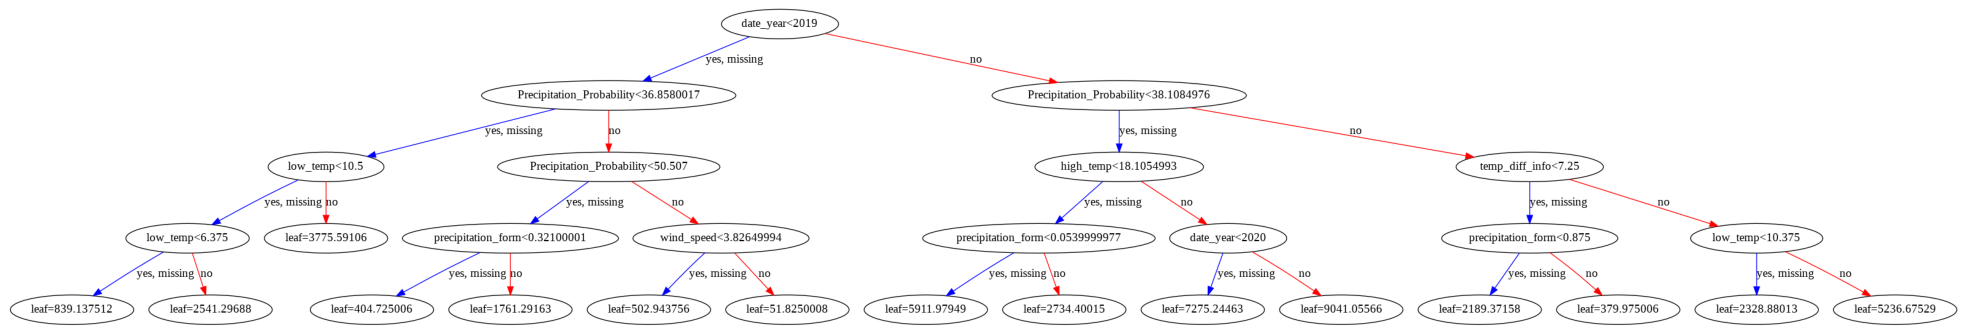

In [ ]:
plot_tree(reg)
fig = plt.gcf()
fig.set_size_inches(35, 25)

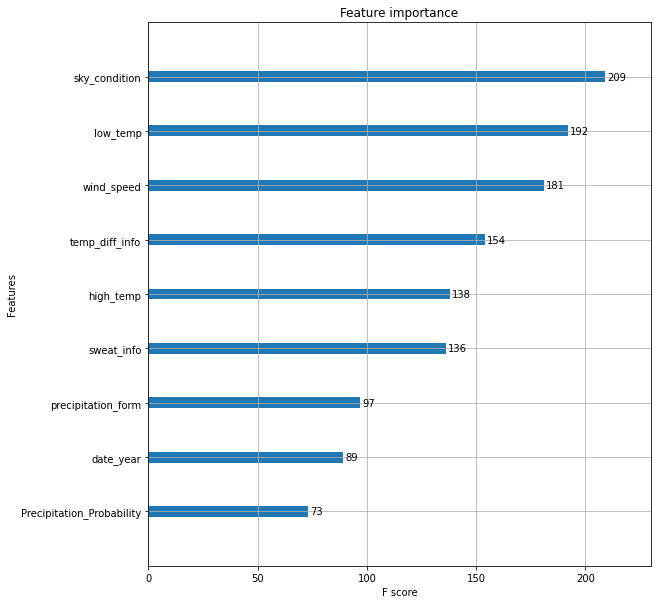

In [ ]:
fig, ax = plt.subplots(figsize=(9,10))
plot_importance(reg, ax=ax)